# Linear Regression Model

In [9]:
using CSV, DataFrames, Plots

Initialize parameters

In [10]:
θ0 = 0.0
θ1 = 0.0
learning_rate = 0.1

0.1

Define linear regression model

In [11]:
f(X) = θ0 .+ θ1 * X

f (generic function with 1 method)

In [12]:
data = CSV.File("data.csv") |> DataFrame
X = data[1:end, 1]
Y = data[1:end, 2]
gr()
plot(X, Y, xlims=(0, 300000), ylims=(0, 9000), ylabel="Price (Dollar)",
    xlabel="Mileage (Km)", legend=false, title="Car mileage versus car price",
    seriestype=:scatter, size = (600, 450))
display(plot!(X, f(X), lw=3, color=:red)))

ErrorException: syntax: extra token ")" after end of expression

Normalize data.

In [13]:
maxX = max(X...)
maxY = max(Y...)
X = X ./ maxX
Y = Y ./ maxY
plot(X, Y, xlims=(0, 1.1), ylims=(0, 1.1), ylabel="Price (normalized)",
    xlabel="Mileage (normalized)", legend=false,
    title="Car mileage versus car price",
    seriestype=:scatter, size = (600, 450))
    display(plot!(X, f(X), lw=3, color=:red)

ErrorException: syntax: incomplete: premature end of input

Define the mean squared error (MSE) cost function.

In [14]:
m = length(X)
cost(θ0, θ1) = (1 / 2m) * sum((f(X) - Y) .^ 2)
cost(θ0, θ1)

0.3038311057062467

Define gradient descent algorithm.

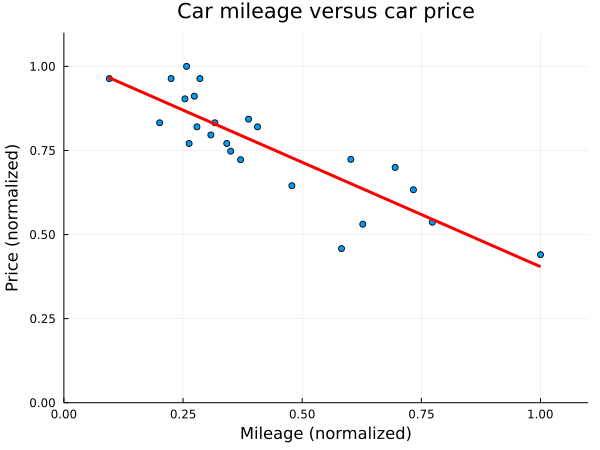

In [15]:
epoch = 0
cost_history = []
push!(cost_history, cost(θ0, θ1))
function train()
	while epoch <= 5000
		tmp_θ0 = (1 / m) * sum(f(X) - Y)
		tmp_θ1 = (1 / m) * sum(X .* (f(X) - Y))
		global θ0 -= learning_rate * tmp_θ0
		global θ1 -= learning_rate * tmp_θ1
		push!(cost_history, cost(θ0, θ1))
		global epoch += 1
	end
end
train()
plot(X, Y, xlims=(0, 1.1), ylims=(0, 1.1), ylabel="Price (normalized)",
xlabel="Mileage (normalized)", legend=false,
title="Car mileage versus car price",
seriestype=:scatter, size = (600, 450))
display(plot!(X, f(X), lw=3, color=:red))
# display(plot(collect(1:5000), cost_history, xlims=(0, 5000), xlabel = "Epoch",
# ylabel = "Cost", title = "Learning curve", lw=3, color=:red))

Define predict prices function.

In [21]:
predict(x) = f(x / maxX) * maxY

predict (generic function with 1 method)

Do some predictions.

In [22]:
# 240000,3650
println(predict(240000))
# 150500,4400
println(predict(150500))
# 67000,6800
println(predict(67000))

3351.8484017465407
5271.530634029315
7062.51908537693
